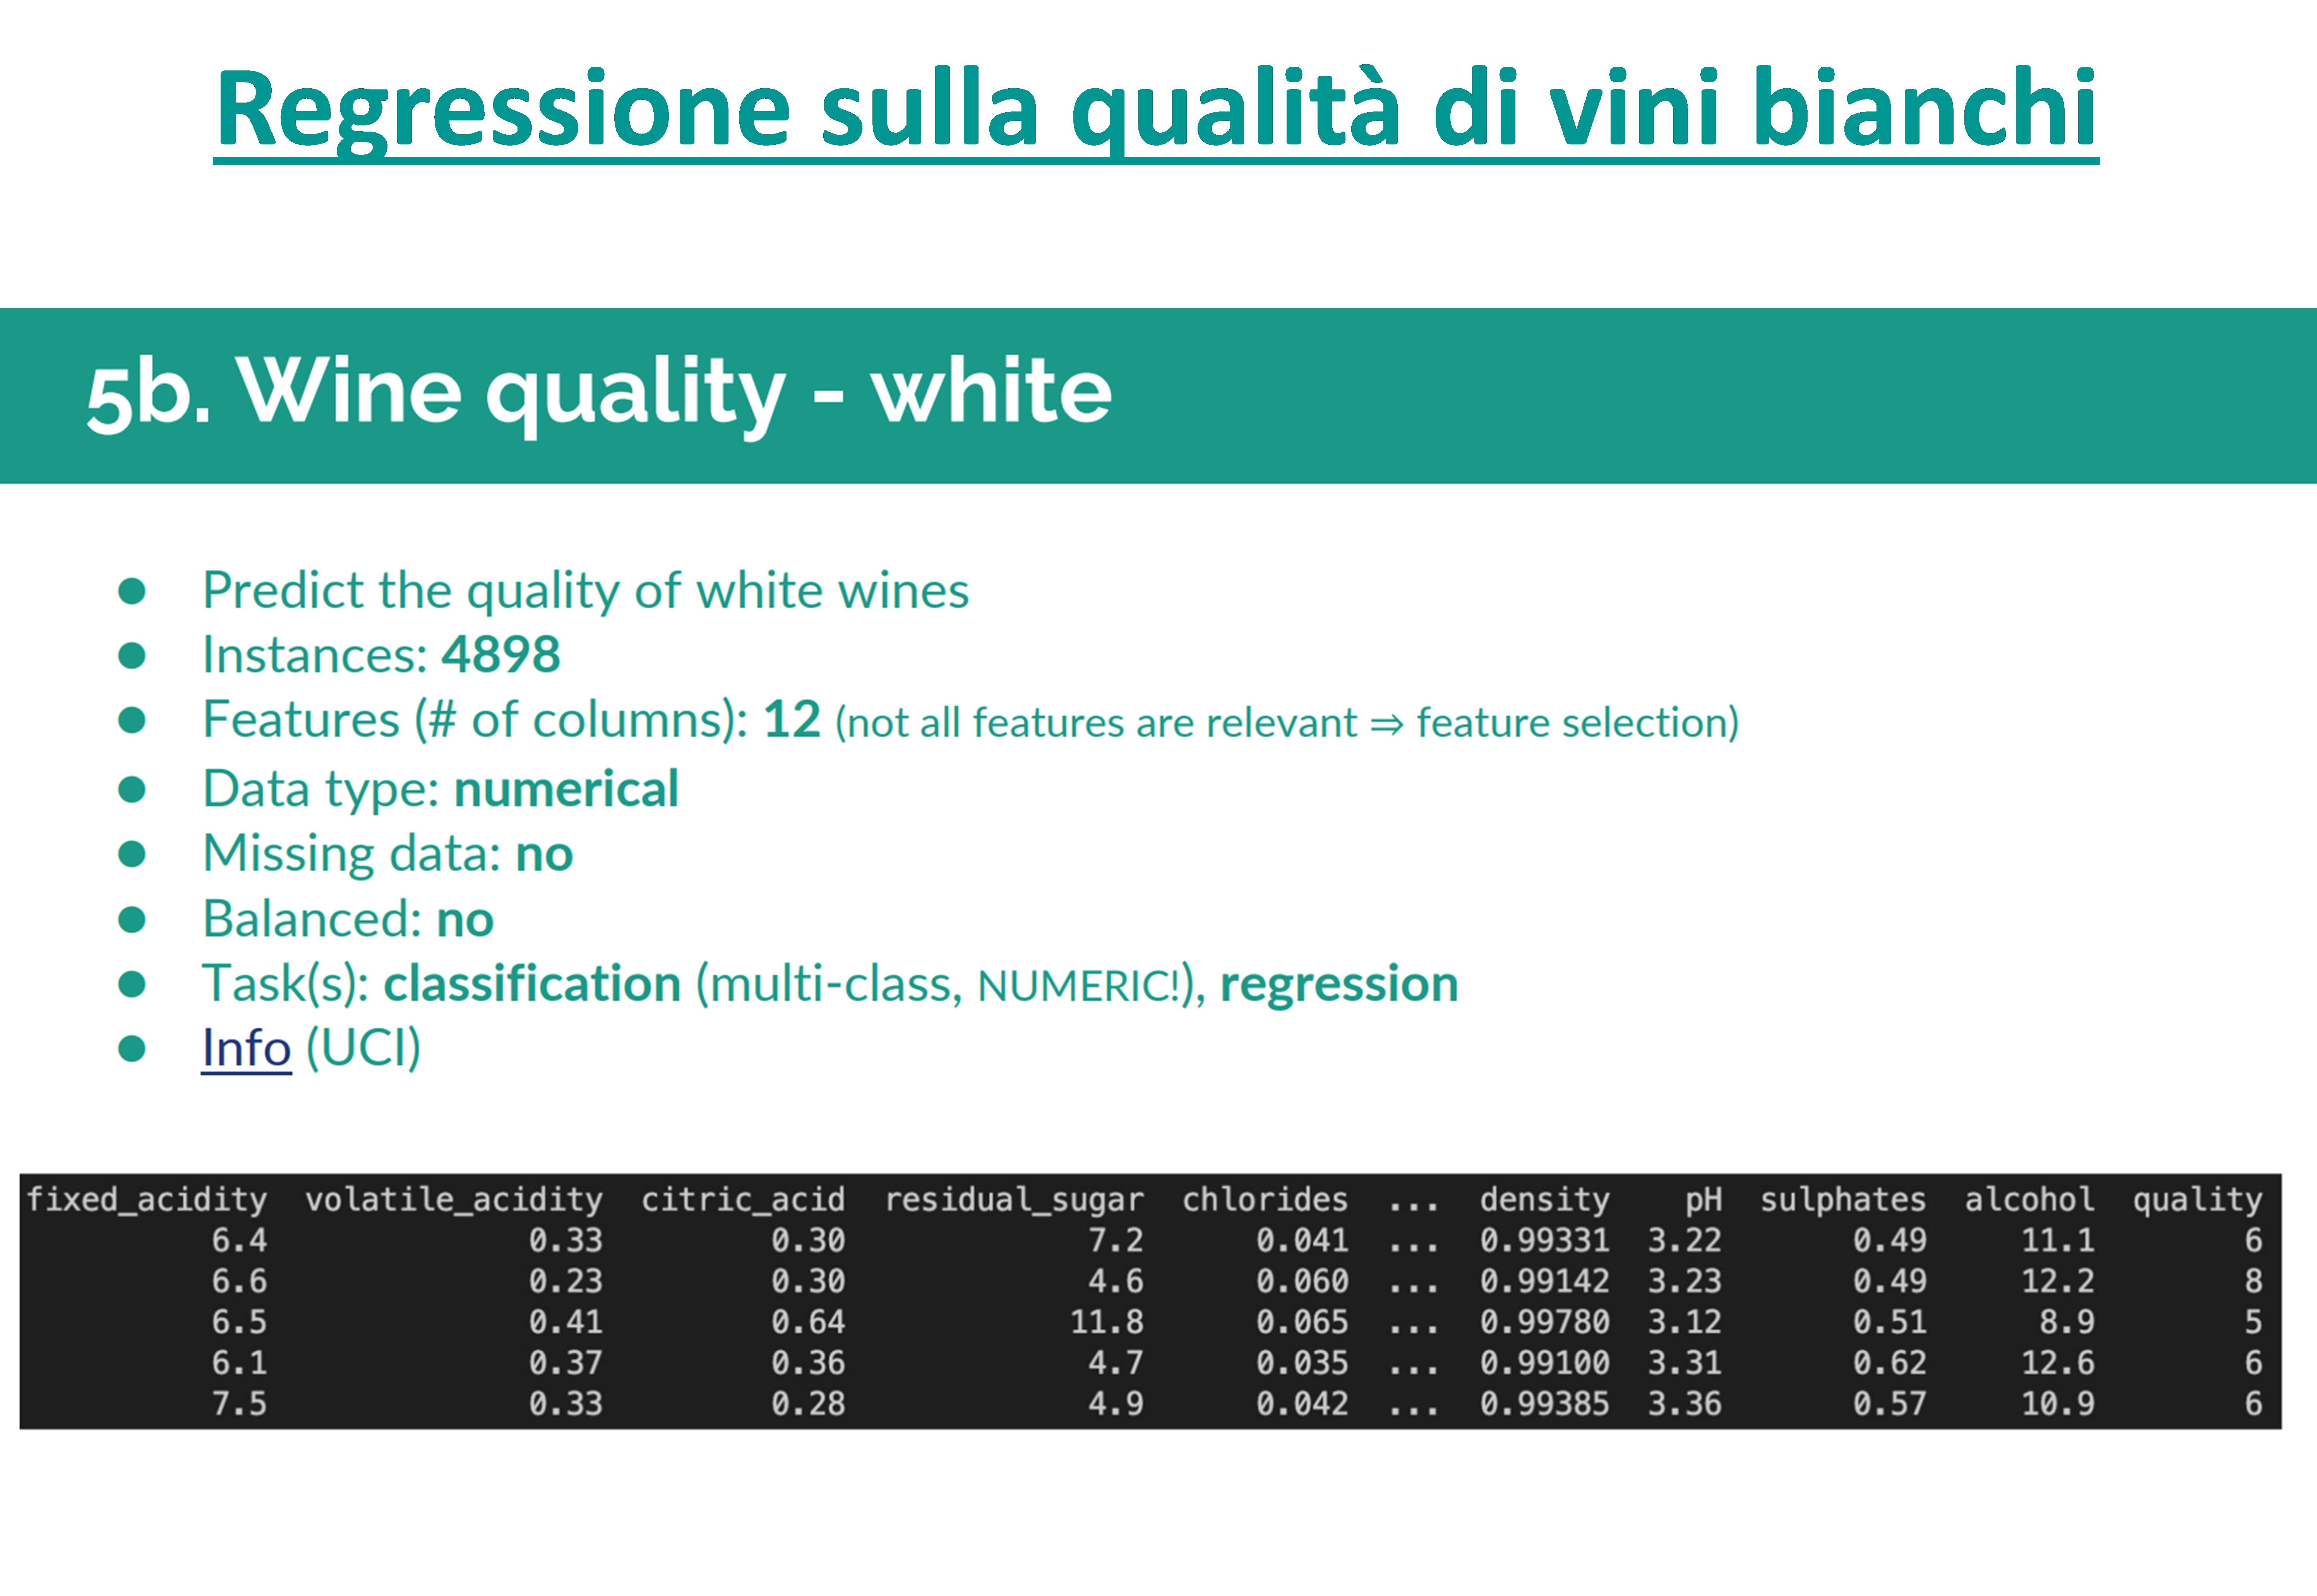

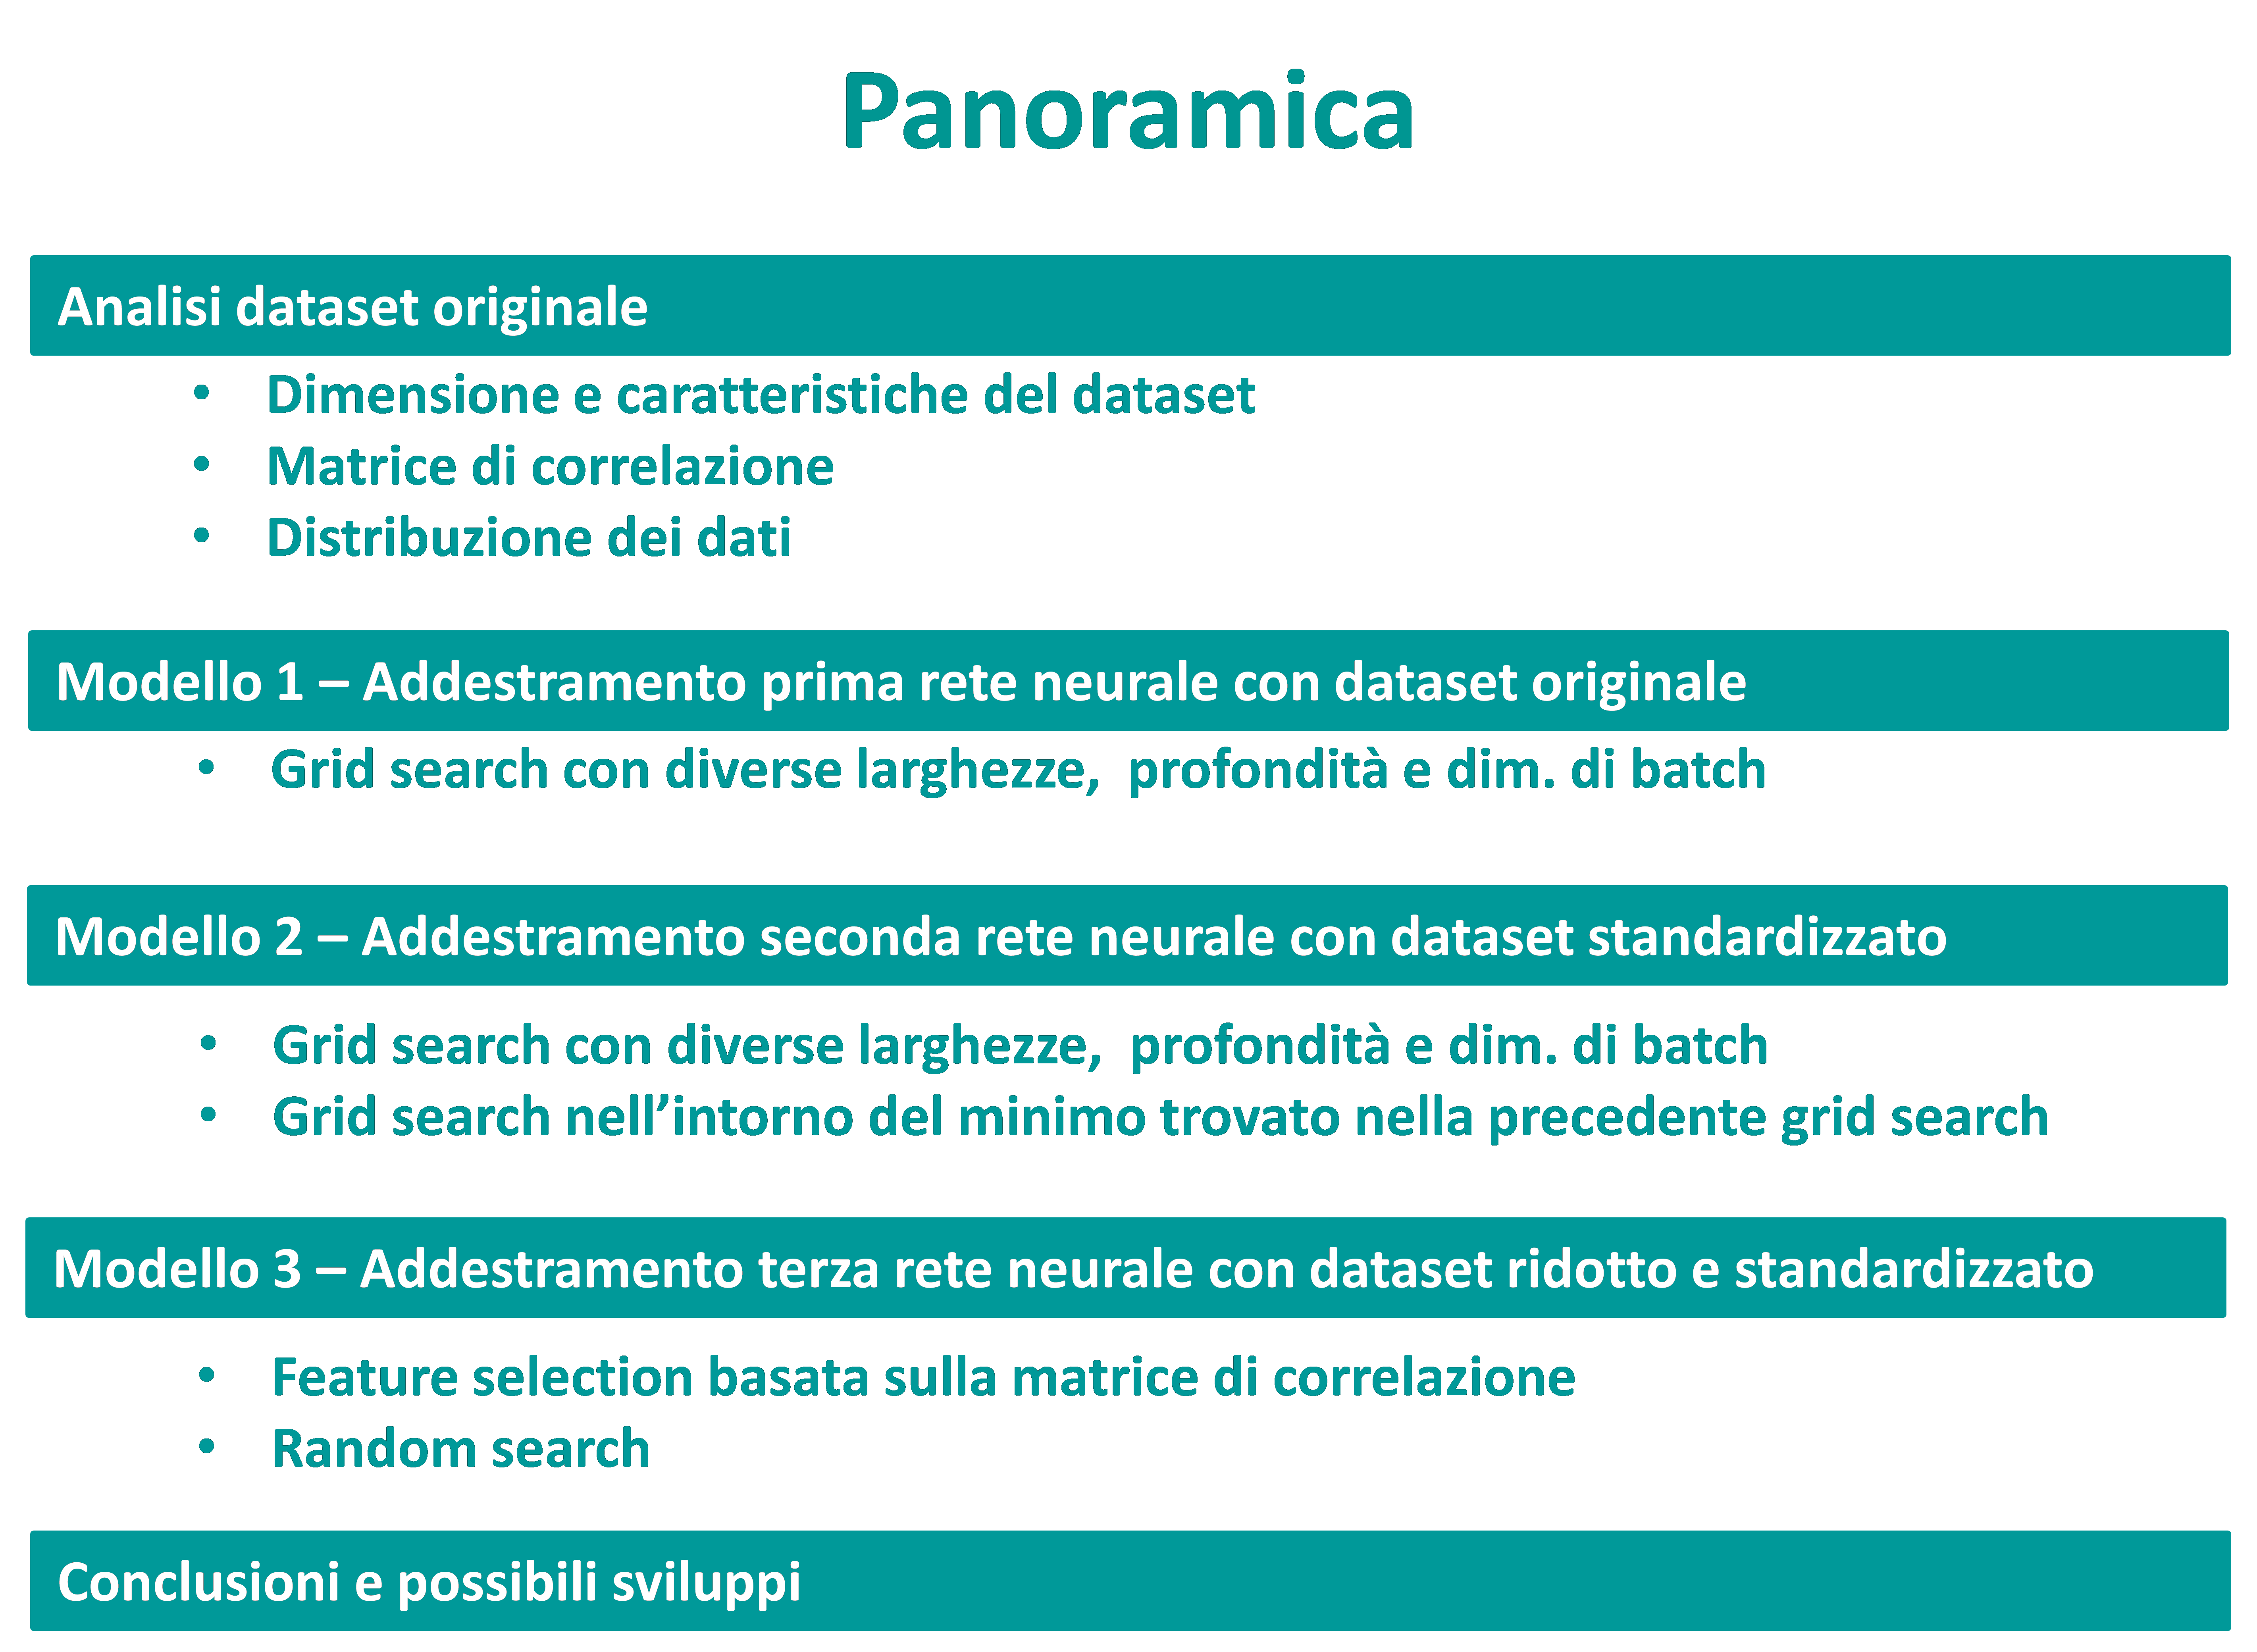

### Analisi dataset originale (non standardizzato)

##### Importo le librerie e il dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

dataset = pd.read_csv("winequality-white.csv", delimiter=";")

In [2]:
dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

##### Mostro la matrice di correlazione

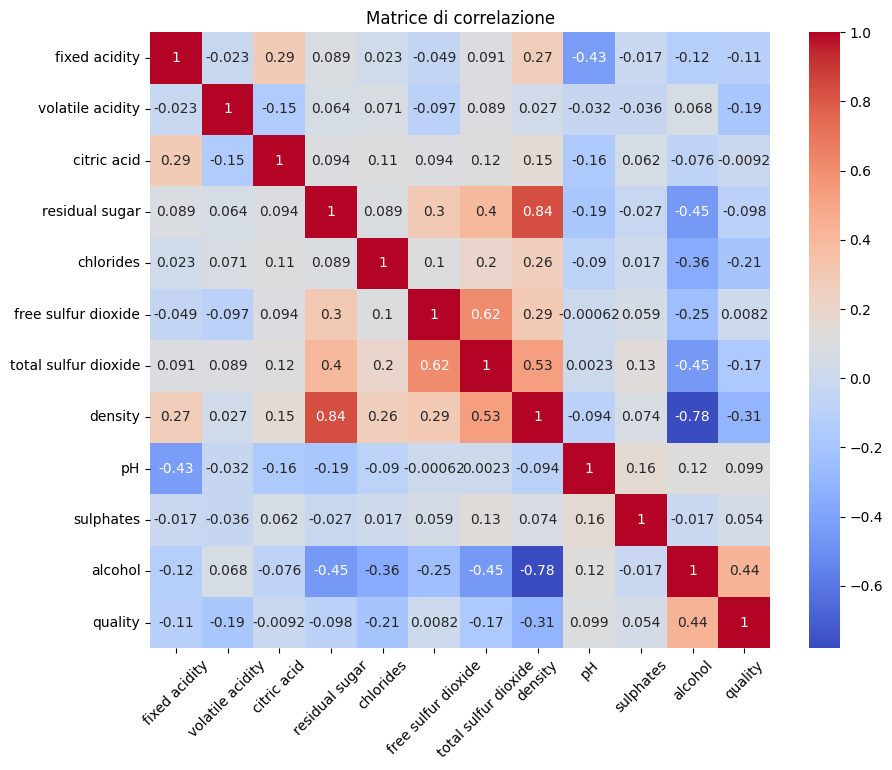

In [ ]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Matrice di correlazione")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

##### Mostro che i possibili valori del target non sono equamente distribuiti (dataset non bilanciato)

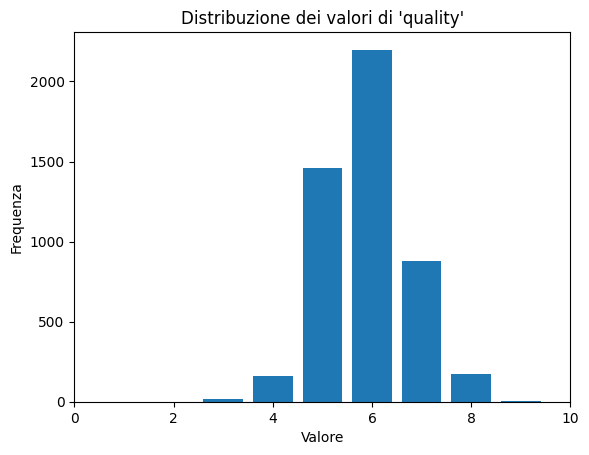

In [ ]:
# Conto le occorrenze dei valori nella colonna "quality"
occorrenze = dataset["quality"].value_counts().sort_index()

plt.bar(occorrenze.index, occorrenze.values)
plt.xlabel("Valore")
plt.ylabel("Frequenza")
plt.title("Distribuzione dei valori di 'quality'")
plt.xlim(0,10)
plt.show()


##### Divido il dataset in features (X) e target (y)

In [ ]:
X = dataset.drop("quality", axis=1)
y = dataset["quality"]

##### Suddivido il dataset in set di training, validation e test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=88)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=88)
# quindi alla fine il training è l'81%, il validation 9% e il test 10%

In [ ]:
print(f"Lunghezza del set di training: {len(X_train)}")
print(f"Lunghezza del set di validation: {len(X_val)}")
print(f"Lunghezza del set di test: {len(X_test)}")

Lunghezza del set di training: 3967
Lunghezza del set di validation: 441
Lunghezza del set di test: 490


##### Modello 1 - Addestramento prima rete neurale con dataset originale

In [ ]:
output_size = 1
hidden_layer_size = 1000

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size,
                          activation='sigmoid',
                          kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1),
                          bias_initializer=tf.random_uniform_initializer(minval=-1, maxval=1)),
    tf.keras.layers.Dense(hidden_layer_size,
                          activation='sigmoid',
                          kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1),
                          bias_initializer=tf.random_uniform_initializer(minval=-1, maxval=1)),
    tf.keras.layers.Dense(hidden_layer_size,
                          activation='sigmoid',
                          kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1),
                          bias_initializer=tf.random_uniform_initializer(minval=-1, maxval=1)),
    tf.keras.layers.Dense(hidden_layer_size,
                          activation='sigmoid',
                          kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1),
                          bias_initializer=tf.random_uniform_initializer(minval=-1, maxval=1)),
    tf.keras.layers.Dense(hidden_layer_size,
                          activation='sigmoid',
                          kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1),
                          bias_initializer=tf.random_uniform_initializer(minval=-1, maxval=1)),
    tf.keras.layers.Dense(output_size, activation='linear') # strato di output
])


model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

batch_size = 100

max_epochs = 10000

early_stopping = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

model.fit(X_train,
          y_train,
          batch_size=batch_size,
          epochs=max_epochs,
          callbacks=[early_stopping],
          validation_data=(X_val, y_val),
          verbose = 2
          )

In [ ]:
# model.save('model.h5')
model = tf.keras.models.load_model('model.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                360       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,111
Trainable params: 4,111
Non-trainabl

In [ ]:
weights = model.layers[0].get_weights()[0]
weights

In [ ]:
bias = model.layers[0].get_weights()[1]
bias

In [ ]:
test_loss, test_mape = model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 1ms/step - loss: 0.5709 - mape: 9.9855


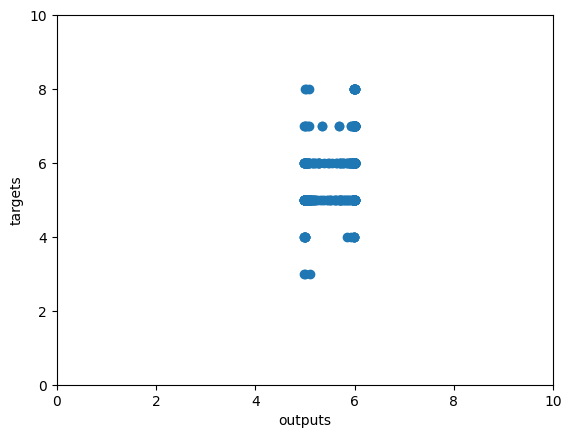

In [ ]:
plt.scatter(np.squeeze(model.predict_on_batch(X_test)), np.squeeze(y_test))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

### Modello 2 - Addestramento seconda rete neurale con dataset standardizzato

### Standardizzazione del dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creo una lista con le colonne da standardizzare (tutte tranne l'ultima)
colonne_da_standardizzare = dataset.iloc[:, :-1]

scaler = StandardScaler()

# Standardizzo e creo un nuovo dataset
colonne_standardizzate = scaler.fit_transform(colonne_da_standardizzare)
dataset_standardizzato = pd.DataFrame(colonne_standardizzate, columns=colonne_da_standardizzare.columns)

print(dataset_standardizzato)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.172097         -0.081770     0.213280        2.821349  -0.035355   
1         -0.657501          0.215896     0.048001       -0.944765   0.147747   
2          1.475751          0.017452     0.543838        0.100282   0.193523   
3          0.409125         -0.478657    -0.117278        0.415768   0.559727   
4          0.409125         -0.478657    -0.117278        0.415768   0.559727   
...             ...               ...          ...             ...        ...   
4893      -0.776015         -0.677101    -0.365197       -0.944765  -0.310008   
4894      -0.301959          0.414339     0.213280        0.317179   0.056196   
4895      -0.420473         -0.379435    -1.191592       -1.023637  -0.218457   
4896      -1.605613          0.116674    -0.282557       -1.043355  -1.088192   
4897      -1.013043         -0.677101     0.378559       -1.102508  -1.179743   

      free sulfur dioxide  

In [ ]:
X2 = dataset_standardizzato
y2 = dataset["quality"] # Tengo la colonna target non standardizzata

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=88)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.1, random_state=88)
# quindi alla fine il training è l'81%, il validation 9% e il test 10%

#### Addestro una rete neurale con grid search

In [ ]:
output_size = 1
varie_larghezze = [50,100,300,400,500]
numero_strati_nascosti = [1,2,3,4,5,6,7,8,9,10]
dimensioni_batch = [10,100,500,1000]

for hidden_layer_size2 in varie_larghezze:
  for prof in numero_strati_nascosti:
    for dimensione_batch in dimensioni_batch:

      model2 = tf.keras.Sequential()
      for cont in range(0,prof):
        model2.add(tf.keras.layers.Dense(hidden_layer_size2,
                                  activation='sigmoid',
                                  kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1),
                                  bias_initializer=tf.random_uniform_initializer(minval=-1, maxval=1)))

      model2.add(tf.keras.layers.Dense(output_size, activation='linear'))


      model2.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

      batch_size2 = dimensione_batch

      max_epochs2 = 10000

      early_stopping2 = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

      model2.fit(X_train2,
                y_train2,
                batch_size=batch_size2,
                epochs=max_epochs2,
                callbacks=[early_stopping2],
                validation_data=(X_val2, y_val2),
                verbose = 0
                )

      test_loss2, test_mape2 = model2.evaluate(X_test2, y_test2)
      print(f"Larghezza: {hidden_layer_size2} \nProfondità: {prof} \nDimensione del batch: {dimensione_batch}\nTest loss: {test_loss2}\nTest mape: {test_mape2}")

#### Addestro una rete neurale con grid search nell'intorno del minimo errore trovato

In [ ]:
output_size = 1
varie_larghezze = [390,400,410]
numero_strati_nascosti = [4,5]
dimensioni_batch = [10]

for hidden_layer_size2 in varie_larghezze:
  for prof in numero_strati_nascosti:
    for dimensione_batch in dimensioni_batch:



      model2 = tf.keras.Sequential()
      for cont in range(0,prof):
        model2.add(tf.keras.layers.Dense(hidden_layer_size2,
                                  activation='sigmoid',
                                  kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1),
                                  bias_initializer=tf.random_uniform_initializer(minval=-1, maxval=1)))

      model2.add(tf.keras.layers.Dense(output_size, activation='linear'))


      model2.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

      batch_size2 = dimensione_batch

      max_epochs2 = 10000

      early_stopping2 = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

      model2.fit(X_train2,
                y_train2,
                batch_size=batch_size2,
                epochs=max_epochs2,
                callbacks=[early_stopping2],
                validation_data=(X_val2, y_val2),
                verbose = 2
                )

      test_loss2, test_mape2 = model2.evaluate(X_test2, y_test2)
      print(f"Larghezza: {hidden_layer_size2} \nProfondità: {prof} \nDimensione del batch: {dimensione_batch}\nTest loss: {test_loss2}\nTest mape: {test_mape2}")

In [ ]:
# model2.save('model2.h5')
model2 = tf.keras.models.load_model('model2.h5')

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 400)               4800      
                                                                 
 dense_12 (Dense)            (None, 400)               160400    
                                                                 
 dense_13 (Dense)            (None, 400)               160400    
                                                                 
 dense_14 (Dense)            (None, 400)               160400    
                                                                 
 dense_15 (Dense)            (None, 1)                 401       
                                                                 
Total params: 486,401
Trainable params: 486,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss2, test_mape2 = model2.evaluate(X_test2, y_test2) # notare che con il dataset standardizzato il valore di mape è diminuito come ci aspettavamo

16/16 [==============================] - 0s 2ms/step - loss: 0.3900 - mape: 6.9724


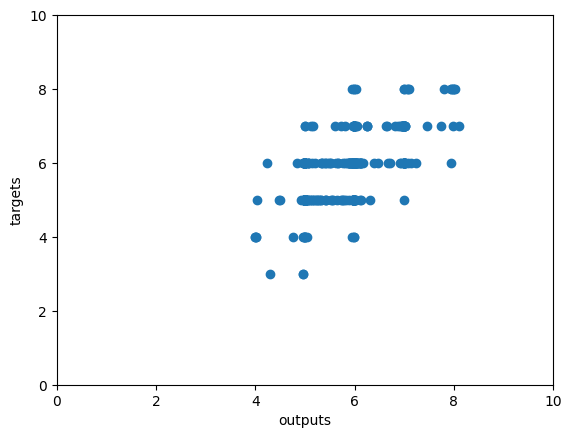

In [ ]:
plt.scatter(np.squeeze(model2.predict_on_batch(X_test2)), np.squeeze(y_test2))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

### Modello 3 - Addestramento terza rete neurale con dataset ridotto e standardizzato

#### Feature selection sul dataset standardizzato

In [ ]:
dataset_ridotto = dataset_standardizzato.drop(['citric acid', 'residual sugar', 'free sulfur dioxide', 'pH', 'sulphates'],axis=1) # Rimuovo le colonne che hanno correlazione minore di 0.1 con il target
dataset_ridotto

fixed acidity  volatile acidity  chlorides  total sulfur dioxide  \
0          0.172097         -0.081770  -0.035355              0.744565   
1         -0.657501          0.215896   0.147747             -0.149685   
2          1.475751          0.017452   0.193523             -0.973336   
3          0.409125         -0.478657   0.559727              1.121091   
4          0.409125         -0.478657   0.559727              1.121091   
...             ...               ...        ...                   ...   
4893      -0.776015         -0.677101  -0.310008             -1.091000   
4894      -0.301959          0.414339   0.056196              0.697499   
4895      -0.420473         -0.379435  -0.218457             -0.643875   
4896      -1.605613          0.116674  -1.088192             -0.667408   
4897      -1.013043         -0.677101  -1.179743             -0.949803   

       density   alcohol  
0     2.331512 -1.393152  
1    -0.009154 -0.824276  
2     0.358665 -0.336667  
3     0.525855 -0.499203  
4     0.525855 -0.499203  
...        ...       ...  
4893 -0.965483  0.557282  
4894  0.291789 -0.743008  
4895 -0.497350 -0.905544  
4896 -1.784717  1.857572  
4897 -1.543962  1.044891  

[4898 rows x 6 columns]

In [ ]:
X3 = dataset_ridotto
y3 = dataset["quality"] # Tengo la colonna target non standardizzata

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.1, random_state=88)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size=0.1, random_state=88)
# quindi alla fine il train è l'81%, il validation 9% e il test 10%

#### Addestro una rete neurale con random search

In [ ]:
output_size = 1
varie_larghezze = [random.randint(10,1000),random.randint(10,1000), random.randint(10,1000)] # random search
numero_strati_nascosti = [random.randint(1,15),random.randint(1,15),random.randint(1,15)]
dimensioni_batch = [10]


for hidden_layer_size2 in varie_larghezze:
  for prof in numero_strati_nascosti:
    for dimensione_batch in dimensioni_batch:

      model3 = tf.keras.Sequential()
      for cont in range(0,prof):
        model3.add(tf.keras.layers.Dense(hidden_layer_size2,
                                  activation='sigmoid',
                                  kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1),
                                  bias_initializer=tf.random_uniform_initializer(minval=-1, maxval=1)))

      model3.add(tf.keras.layers.Dense(output_size, activation='linear'))


      model3.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mape'])

      batch_size2 = dimensione_batch

      max_epochs2 = 10000

      early_stopping2 = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

      model3.fit(X_train3,
                y_train3,
                batch_size=batch_size2,
                epochs=max_epochs2,
                callbacks=[early_stopping2],
                validation_data=(X_val3, y_val3),
                verbose = 0
                )

      test_loss3, test_mape3 = model3.evaluate(X_test3, y_test3)
      print(f"Larghezza: {hidden_layer_size2} \nProfondità: {prof} \nDimensione del batch: {dimensione_batch}\nTest loss: {test_loss3}\nTest mape: {test_mape3}")

16/16 [==============================] - 0s 2ms/step - loss: 0.4906 - mape: 8.7799
Larghezza: 300 
Profondità: 3 
Dimensione del batch: 10
Test loss: 0.49055492877960205
Test mape: 8.77989673614502


In [ ]:
# model3.save('model3.h5')
# model3 = tf.keras.models.load_model('model3.h5')

In [ ]:
model3.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_260 (Dense)           (None, 300)               2100      
                                                                 
 dense_261 (Dense)           (None, 300)               90300     
                                                                 
 dense_262 (Dense)           (None, 300)               90300     
                                                                 
 dense_263 (Dense)           (None, 1)                 301       
                                                                 
Total params: 183,001
Trainable params: 183,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss3, test_mape3 = model3.evaluate(X_test3, y_test3)

16/16 [==============================] - 0s 2ms/step - loss: 0.4906 - mape: 8.7799


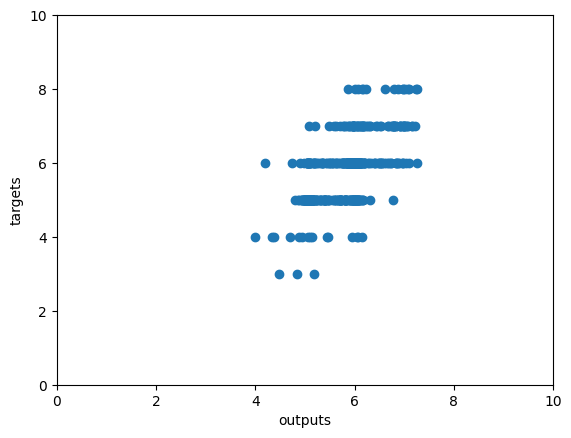

In [ ]:
plt.scatter(np.squeeze(model3.predict_on_batch(X_test3)), np.squeeze(y_test3))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

### Grafico atteso con dataset ideale

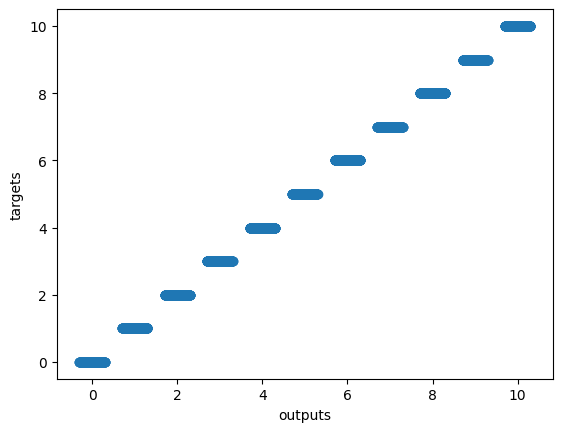

In [3]:
observations = 500*11

y_fittizia = np.random.randint(low=0, high=11, size=(observations,1))


noise = np.random.uniform(-0.3, 0.3, (observations,1))

x_fittizia = y_fittizia + noise
plt.xlabel('outputs')
plt.ylabel('targets')
plt.scatter(x_fittizia,y_fittizia)

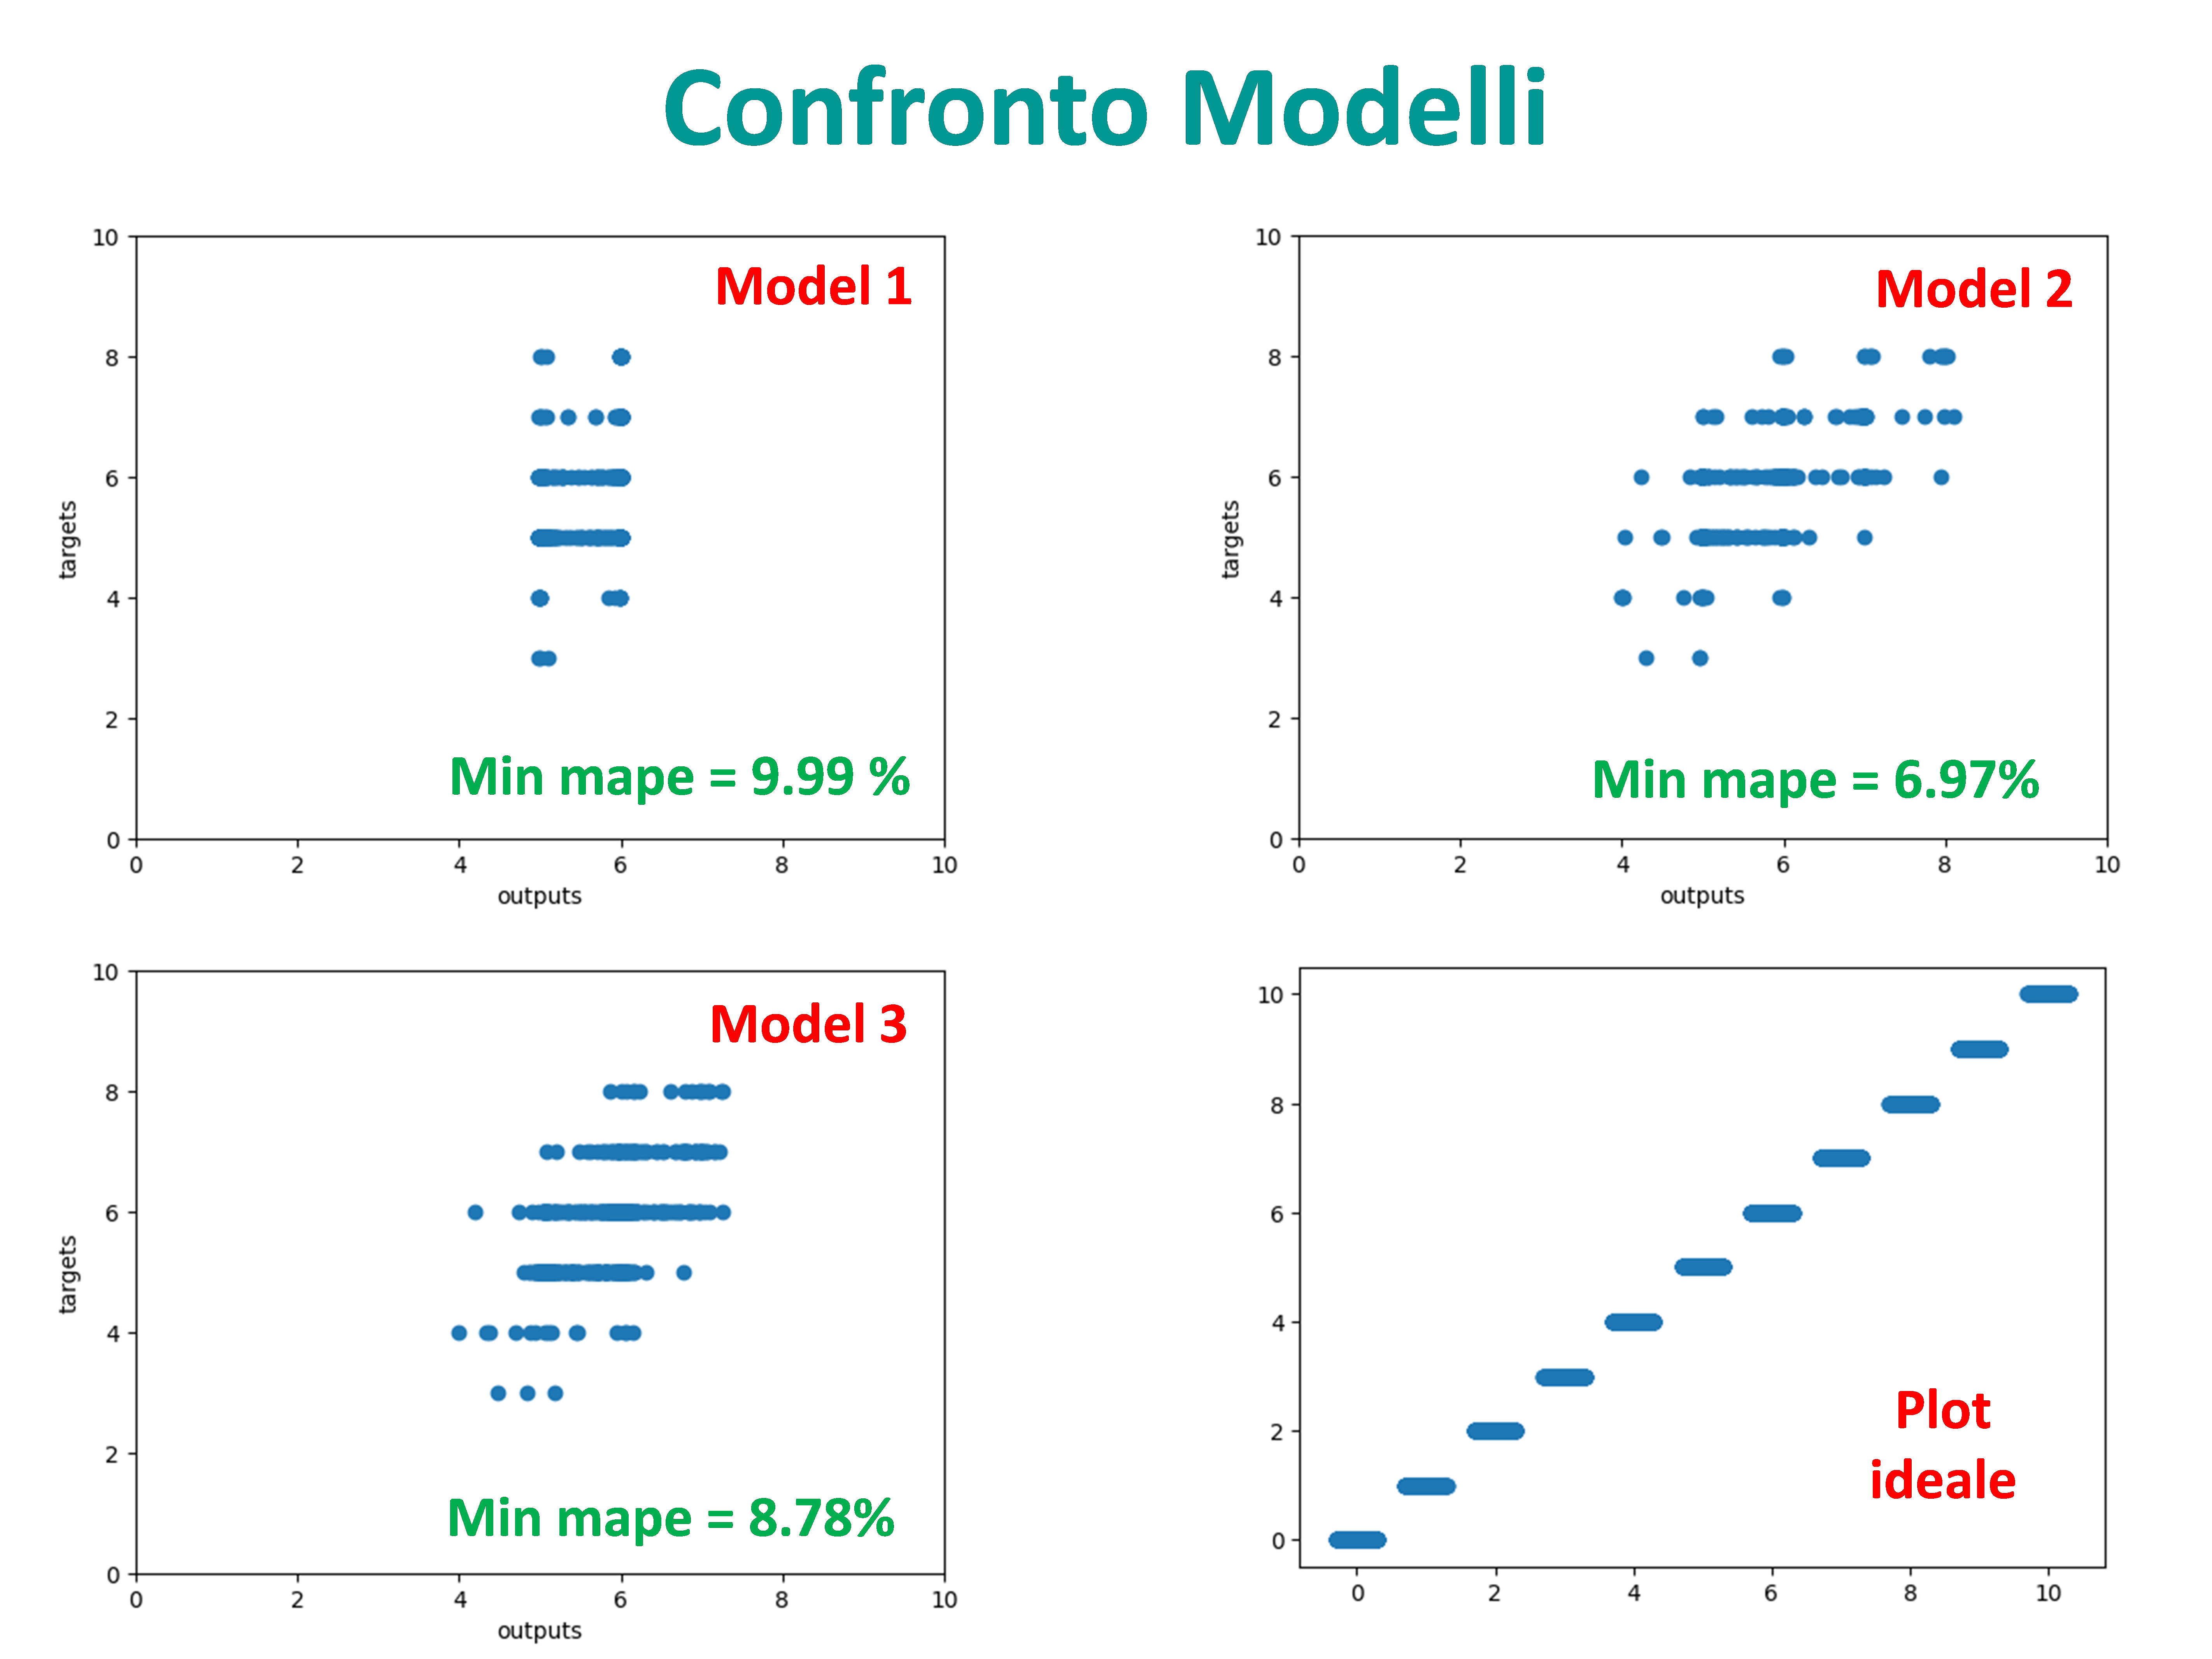

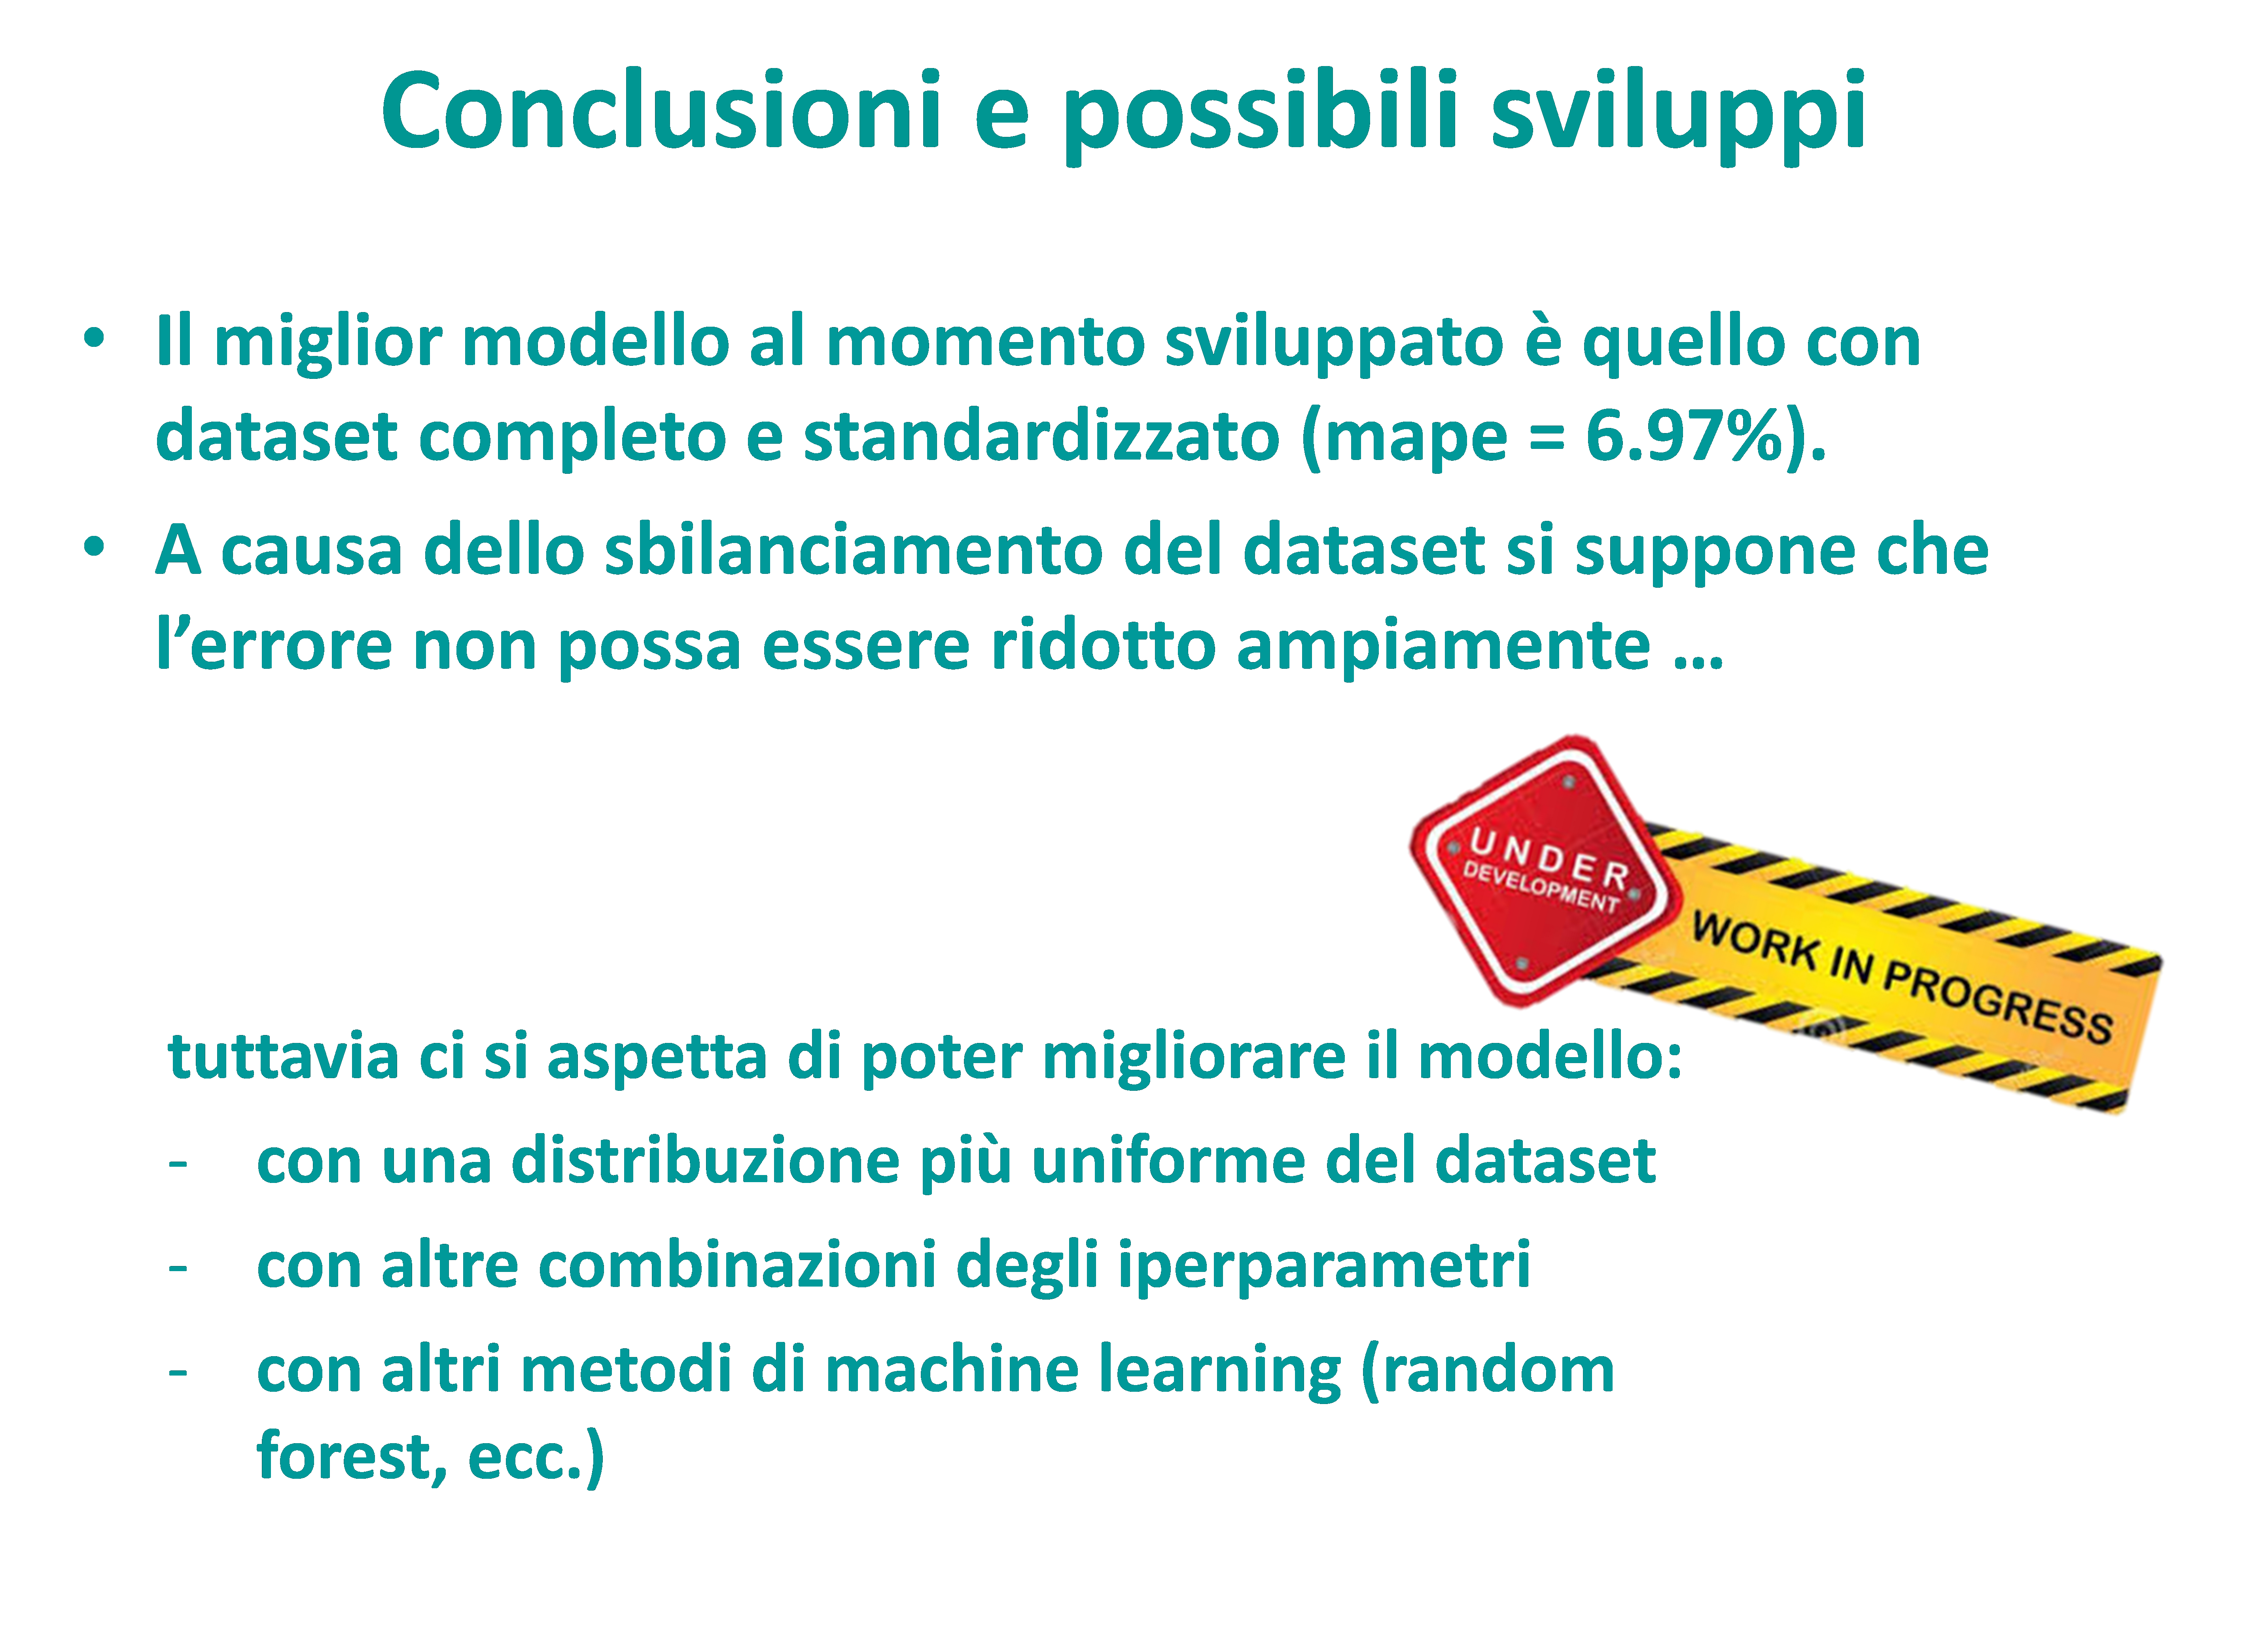

#            **Grazie per l'attenzione**